In [1]:
#importing libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bestcard/BestCard_data.csv


### Reading the Dataset

In [2]:
card = pd.read_csv('/kaggle/input/bestcard/BestCard_data.csv')

### Exploratory Data Analysis 

Exploratory Data Analysis (EDA) is the process of examining and summarizing data in order to understand its main characteristics, detect patterns, identify outliers, and test assumptions. EDA typically involves visualizing data through various graphs and charts.

In [3]:
#top 5 rows in dataset
card.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,EDUCATION_CAT,graduate school,high school,none,others,university
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,1,university,0,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,1000,0,2000,1,university,0,0,0,0,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,1000,1000,5000,0,university,0,0,0,0,1
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,1100,1069,1000,0,university,0,0,0,0,1
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,9000,689,679,0,university,0,0,0,0,1


In [4]:
card.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26664 entries, 0 to 26663
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          26664 non-null  object
 1   LIMIT_BAL                   26664 non-null  int64 
 2   SEX                         26664 non-null  int64 
 3   EDUCATION                   26664 non-null  int64 
 4   MARRIAGE                    26664 non-null  int64 
 5   AGE                         26664 non-null  int64 
 6   PAY_1                       26664 non-null  int64 
 7   PAY_2                       26664 non-null  int64 
 8   PAY_3                       26664 non-null  int64 
 9   PAY_4                       26664 non-null  int64 
 10  PAY_5                       26664 non-null  int64 
 11  PAY_6                       26664 non-null  int64 
 12  BILL_AMT1                   26664 non-null  int64 
 13  BILL_AMT2                   26664 non-null  in

In [5]:
card.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,graduate school,high school,none,others,university
count,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000,...,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000
mean,167919.054905,1.603060,1.842334,1.556031,35.505213,-0.017777,-0.133363,-0.167679,-0.225023,-0.269764,...,5259.514964,4887.048717,4843.729973,5257.843047,0.221797,0.352985,0.164266,0.011214,0.004313,0.467222
std,129839.453081,0.489272,0.744661,0.521463,9.227442,1.126769,1.198640,1.199165,1.167897,1.131735,...,17265.439561,15956.349371,15311.721795,17635.468185,0.415463,0.477907,0.370524,0.105301,0.065532,0.498934
min,10000.000000,1.000000,1.000000,1.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,390.000000,294.750000,242.750000,111.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1822.000000,1500.000000,1500.000000,1500.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,4556.250000,4050.500000,4082.750000,4015.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
max,800000.000000,2.000000,4.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,889043.000000,621000.000000,426529.000000,528666.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


We can infer from our description that the maximum amount of given credit(LIMIT_BAL) is 800K and the minimum is 10K 

In [6]:
card['SEX'].value_counts()

2    16080
1    10584
Name: SEX, dtype: int64

### Total number of females are 16080 and males are 10584

In [7]:
card['EDUCATION_CAT'].value_counts()

university         12458
graduate school     9412
high school         4380
none                 299
others               115
Name: EDUCATION_CAT, dtype: int64

<AxesSubplot:xlabel='EDUCATION_CAT', ylabel='count'>

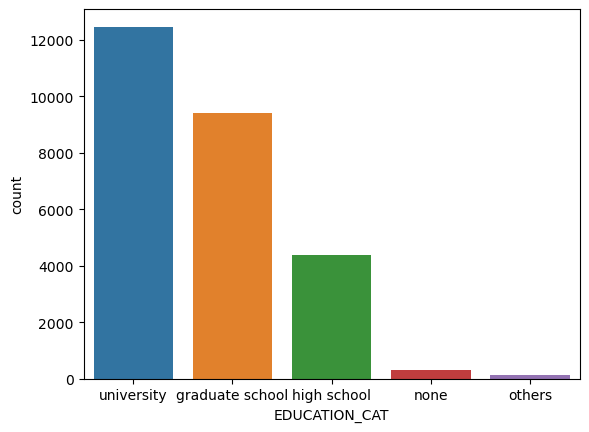

In [8]:
import seaborn as sns
sns.countplot(data=card, x='EDUCATION_CAT' )

### Maximum number of customers have University level education

In [9]:
card['default payment next month'].value_counts()

0    20750
1     5914
Name: default payment next month, dtype: int64

In [10]:
#checking only customers who have defaulted 
card_new = card[card['default payment next month']==1]

In [11]:
#Differentiating them on the basis of their sex
card_new['SEX'].value_counts()

2    3350
1    2564
Name: SEX, dtype: int64

<AxesSubplot:xlabel='SEX', ylabel='count'>

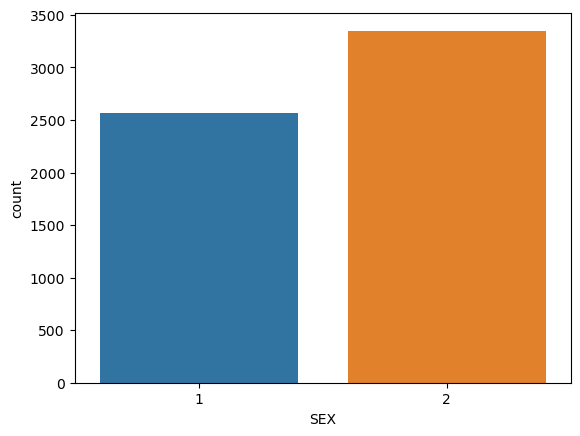

In [12]:
sns.countplot(data=card_new, x='SEX')

### Maximum default are done by female customers

In [13]:
card_new['MARRIAGE'].value_counts()

2    2978
1    2856
3      80
Name: MARRIAGE, dtype: int64

### Customers whose status is single has defaulted the most 

In [14]:
bins= [21,30,40,60,80]
labels = ['Early 20s','Early 30s','Early 40s','Senior']
card_new['AgeGroup'] = pd.cut(card_new['AGE'], bins=bins, labels=labels, right=False)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [15]:
card_new.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,PAY_AMT5,PAY_AMT6,default payment next month,EDUCATION_CAT,graduate school,high school,none,others,university,AgeGroup
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,1,university,0,0,0,0,1,Early 20s
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,0,2000,1,university,0,0,0,0,1,Early 20s
13,a17b23d4-357b,70000,1,2,2,30,1,2,2,0,...,1500,0,1,university,0,0,0,0,1,Early 30s
16,cbf648a6-98aa,20000,1,1,2,24,0,0,2,2,...,1650,0,1,graduate school,1,0,0,0,0,Early 20s
20,834b2cac-750e,120000,2,2,1,39,-1,-1,-1,-1,...,316,0,1,university,0,0,0,0,1,Early 30s


<AxesSubplot:xlabel='AgeGroup', ylabel='count'>

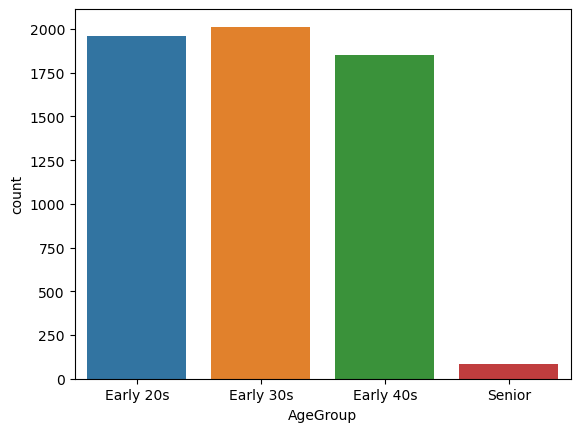

In [16]:
sns.countplot(data=card_new,x='AgeGroup')

### Customer between age group of 30 and 40 have defaulted the most

In [17]:
# Column to be considered 
num_column = ['LIMIT_BAL','SEX','EDUCATION','MARRIAGE','AGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',
           'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
          'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4','PAY_AMT5', 'PAY_AMT6','default payment next month']

<AxesSubplot:>

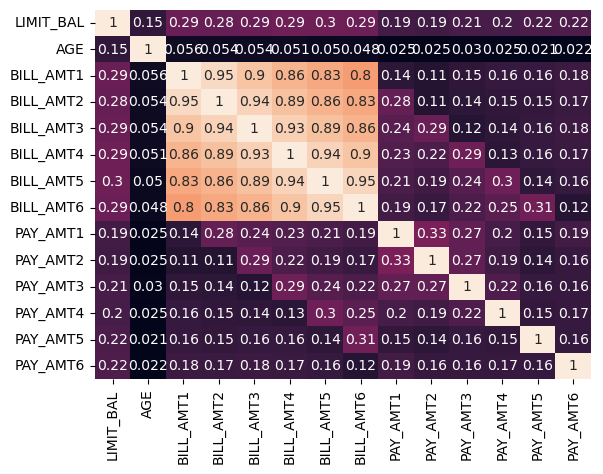

In [18]:
#heatmap to analyze the correlation between features
numeric_col=['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2','BILL_AMT3', 'BILL_AMT4',
             'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1','PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4',
             'PAY_AMT5', 'PAY_AMT6']
sns.heatmap(card[numeric_col].corr(),cbar=False,annot=True)

In [19]:
std_card = card[num_column]

### StandardScaler removes the mean and scales the data to the unit variance.

In [20]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(std_card)
standard_card= scaler.transform(card[num_column])

In [21]:
card_std = pd.DataFrame(standard_card,columns = ['LIMIT_BAL','SEX','EDUCATION','MARRIAGE', 'AGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',
           'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
          'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4','PAY_AMT5', 'PAY_AMT6','default payment next month'])

In [22]:
card_std

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,0.012658,1.0,0.333333,0.0,0.051724,0.4,0.4,0.1,0.1,0.0,...,0.193873,0.089884,0.326684,0.000000,0.000561,0.000000,0.000000,0.000000,0.000000,1.0
1,0.139241,1.0,0.333333,0.5,0.086207,0.1,0.4,0.2,0.2,0.2,...,0.197604,0.093703,0.329821,0.000000,0.000815,0.001125,0.001610,0.000000,0.003783,1.0
2,0.101266,1.0,0.333333,0.5,0.224138,0.2,0.2,0.2,0.2,0.2,...,0.210216,0.106404,0.341641,0.001738,0.001222,0.001125,0.001610,0.002345,0.009458,0.0
3,0.050633,1.0,0.333333,0.0,0.275862,0.2,0.2,0.2,0.2,0.2,...,0.226163,0.121888,0.355107,0.002290,0.001645,0.001350,0.001771,0.002506,0.001892,0.0
4,0.050633,0.0,0.333333,0.0,0.620690,0.1,0.2,0.1,0.2,0.2,...,0.217753,0.111043,0.345087,0.002290,0.029893,0.011248,0.014493,0.001615,0.001284,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26659,0.265823,0.0,0.666667,0.0,0.310345,0.2,0.2,0.2,0.2,0.2,...,0.294235,0.124405,0.342056,0.009730,0.016299,0.005627,0.004907,0.011723,0.001892,0.0
26660,0.177215,0.0,0.666667,0.5,0.379310,0.1,0.1,0.1,0.1,0.2,...,0.204113,0.095620,0.326684,0.002103,0.002873,0.010121,0.000208,0.000000,0.000000,0.0
26661,0.025316,0.0,0.333333,0.5,0.275862,0.6,0.5,0.4,0.1,0.2,...,0.217683,0.112630,0.345304,0.000000,0.000000,0.024746,0.006763,0.004689,0.005864,1.0
26662,0.088608,0.0,0.666667,0.0,0.344828,0.3,0.1,0.2,0.2,0.2,...,0.254058,0.102986,0.373766,0.098334,0.002778,0.001325,0.003101,0.124174,0.003412,1.0


In [23]:
# Seperating X and y 
X = pd.get_dummies(card_std.iloc[:, 0:23],drop_first=True)

In [24]:
X

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,0.012658,1.0,0.333333,0.0,0.051724,0.4,0.4,0.1,0.1,0.0,...,0.156026,0.193873,0.089884,0.326684,0.000000,0.000561,0.000000,0.000000,0.000000,0.000000
1,0.139241,1.0,0.333333,0.5,0.086207,0.1,0.4,0.2,0.2,0.2,...,0.157995,0.197604,0.093703,0.329821,0.000000,0.000815,0.001125,0.001610,0.000000,0.003783
2,0.101266,1.0,0.333333,0.5,0.224138,0.2,0.2,0.2,0.2,0.2,...,0.168739,0.210216,0.106404,0.341641,0.001738,0.001222,0.001125,0.001610,0.002345,0.009458
3,0.050633,1.0,0.333333,0.0,0.275862,0.2,0.2,0.2,0.2,0.2,...,0.204035,0.226163,0.121888,0.355107,0.002290,0.001645,0.001350,0.001771,0.002506,0.001892
4,0.050633,0.0,0.333333,0.0,0.620690,0.1,0.2,0.1,0.2,0.2,...,0.190743,0.217753,0.111043,0.345087,0.002290,0.029893,0.011248,0.014493,0.001615,0.001284
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26659,0.265823,0.0,0.666667,0.0,0.310345,0.2,0.2,0.2,0.2,0.2,...,0.361169,0.294235,0.124405,0.342056,0.009730,0.016299,0.005627,0.004907,0.011723,0.001892
26660,0.177215,0.0,0.666667,0.5,0.379310,0.1,0.1,0.1,0.1,0.2,...,0.158805,0.204113,0.095620,0.326684,0.002103,0.002873,0.010121,0.000208,0.000000,0.000000
26661,0.025316,0.0,0.333333,0.5,0.275862,0.6,0.5,0.4,0.1,0.2,...,0.158070,0.217683,0.112630,0.345304,0.000000,0.000000,0.024746,0.006763,0.004689,0.005864
26662,0.088608,0.0,0.666667,0.0,0.344828,0.3,0.1,0.2,0.2,0.2,...,0.230719,0.254058,0.102986,0.373766,0.098334,0.002778,0.001325,0.003101,0.124174,0.003412


In [25]:
y = card_std['default payment next month'].values

### Splitting into train and test 
By splitting the data into training and testing sets, we can assess the model's ability to generalize to new data. If the model performs well on the testing set, we can be more confident that it will perform well on new data.

In [26]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

### Modeling - Decision Tree
A decision tree is an algorithm used for both classification and regression problems. It is a supervised learning algorithm that builds a model in the form of a tree-like structure to make decisions based on input features. 


In [27]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier 
tree = DecisionTreeClassifier(random_state = 0) 

In [28]:
tree.fit(X_train, y_train) 

DecisionTreeClassifier(random_state=0)

In [29]:
from sklearn.metrics import accuracy_score 
y_pred = tree.predict(X_test)
print("Accuracy on testing set: {:.3f}".format(accuracy_score(y_pred,y_test)))

Accuracy on testing set: 0.730


In [30]:
# to avoid overfitting
tree_pruned = DecisionTreeClassifier(max_depth=4, random_state=0) 

In [31]:
tree_pruned.fit(X_train, y_train)
y_pruned_pred = tree_pruned.predict(X_test) 

In [32]:
print("Accuracy on testing set: {:.3f}".format(accuracy_score(y_pruned_pred,y_test)))


Accuracy on testing set: 0.827


In [33]:
#Hyperparameter tuning 
from sklearn.model_selection import GridSearchCV 
 
params = {'criterion':['gini','entropy'],'max_leaf_nodes': list(range(2, 50)), 'max_depth': np.arange(3, 15)} 
tree_grid = GridSearchCV(tree, params, cv=10) 


In [34]:
tree_grid.fit(X_train, y_train) 
tree_grid.best_estimator_ 

DecisionTreeClassifier(max_depth=3, max_leaf_nodes=8, random_state=0)

In [35]:
y_pred_grid = tree_grid.predict(X_test) 
print("Grid-search Model Accuracy on test set: {:.3f}".format(accuracy_score(y_test, y_pred_grid))) 

Grid-search Model Accuracy on test set: 0.828


A confusion matrix is used to evaluate the performance of a classification algorithm. It is used to compare the predicted values with the actual values of the target variable and evaluate the model's performance.

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


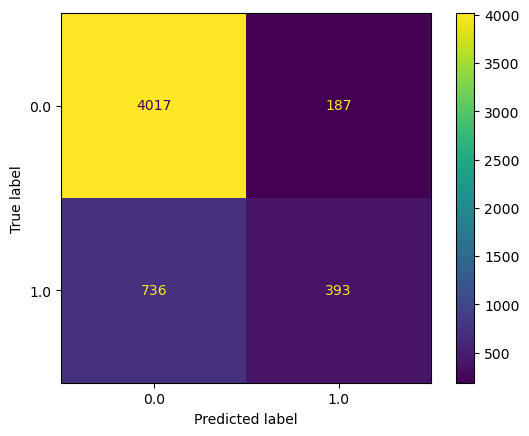

In [36]:
from sklearn.metrics import plot_confusion_matrix 
plot_confusion_matrix(tree_pruned, X_test, y_test) 

In [37]:
y_pruned_pred_proba = tree_grid.predict_proba(X_test)[:,1] 

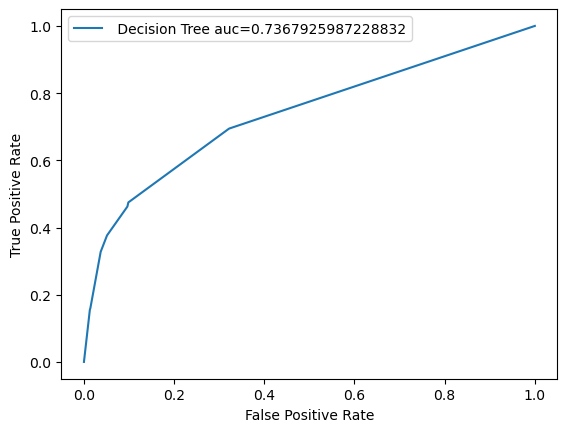

In [38]:
from matplotlib import pyplot
#keep probabilities for the positive outcome only
import sklearn.metrics as metrics
fpr, tpr, _ = metrics.roc_curve(y_test,y_pruned_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pruned_pred_proba)
pyplot.plot(fpr,tpr,label=" Decision Tree auc="+str(auc))
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
pyplot.show()

**Area Under Curve for Decision Tree is 73.67%**

### Random Forest
Random Forest can handle large datasets with high-dimensional features and complex interactions between the features and is also less prone to overfitting compared to other algorithms, such as decision trees, due to its ensemble-based approach.

In [39]:
from sklearn.ensemble import RandomForestClassifier 
 
forest = RandomForestClassifier(n_estimators=1000, random_state=0) 
forest.fit(X_train, y_train) 
 
y_rf_pred = forest.predict(X_test) 
print("Random Forest Accuracy on test set: {:.3f}".format(accuracy_score(y_test, y_rf_pred))) 

Random Forest Accuracy on test set: 0.823


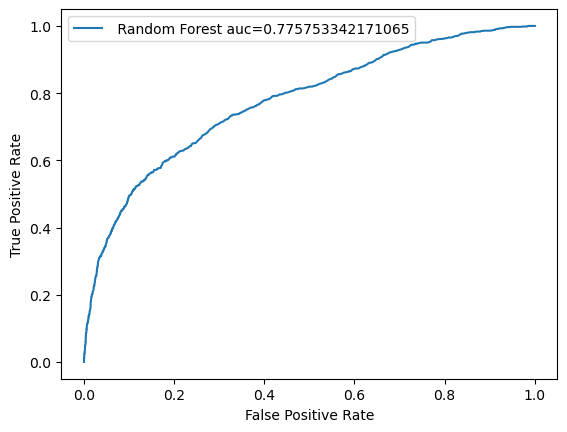

In [53]:
from matplotlib import pyplot
#keep probabilities for the positive outcome only
y_pred_proba = forest.predict_proba(X_test)[:,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test,y_pred_proba)
pyplot.plot(fpr,tpr,label=" Random Forest auc="+str(auc))
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
pyplot.show()

**Area Under Curve for Random Forest is 77.57%**

### Logistic Regression 

Logistic Regression algorithm that is used to solve binary classification problems. It is a type of supervised learning algorithm that is used to model the probability of a binary response based on one or more predictor variables.

In [41]:
from sklearn.linear_model import LogisticRegression
# instantiate the model (using the default parameters)
logreg = LogisticRegression(max_iter = 200)
# fit the model with data
logreg.fit(X_train,y_train)
# the coefficients maximizes the likelihood of observing the data
coef = pd.DataFrame(logreg.coef_[0], index = X.columns,columns=['Coefficients'])
coef



,Coefficients
LIMIT_BAL,-0.761702
SEX,-0.092564
EDUCATION,-0.305235
MARRIAGE,-0.319594
AGE,0.441218
PAY_1,5.566844
PAY_2,0.886796
PAY_3,0.953843
PAY_4,0.226267
PAY_5,0.247063


In [42]:
import numpy as np
df = pd.DataFrame(np.exp(logreg.coef_)[0], index = X_train.columns,columns = ['Odds'])
df.sort_values(by=['Odds'], ascending = True)


y_pred=logreg.predict(X_test)
y_pred

import sklearn.metrics as metrics
print("Accuracy of Logistic Regression:{:.3f}".format(metrics.accuracy_score(y_test, y_pred)))

Accuracy of Logistic Regression:0.824


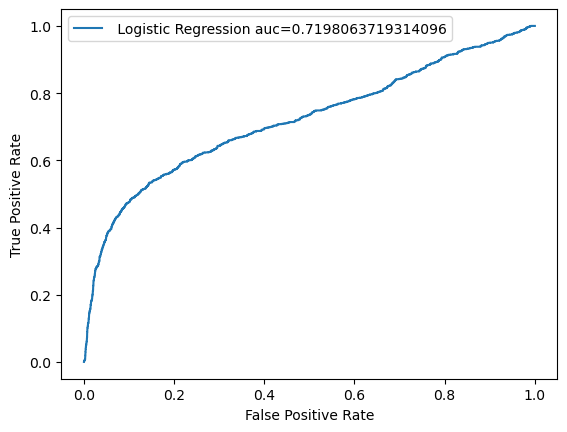

In [43]:
from matplotlib import pyplot
#keep probabilities for the positive outcome only
y_pred_proba = logreg.predict_proba(X_test)[:,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
pyplot.plot(fpr,tpr,label=" Logistic Regression auc="+str(auc))
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
pyplot.show()

**Area Under Curve is 71.9% for Logistic Regression**

### Support Vector Machine
The SVM solution is the one that gives the best possible separation between classes(default or not default) that is the widest margin without unnecessary misclassifications.

In [44]:
from sklearn.svm import SVC
clf_svm = SVC(random_state = 42)
clf_svm.fit(X_train, y_train)

SVC(random_state=42)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


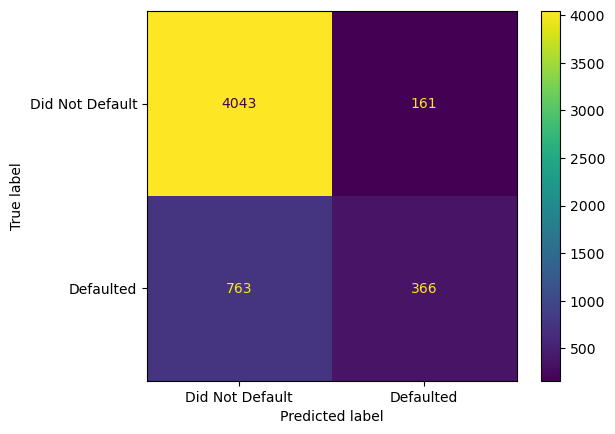

In [45]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf_svm, X_test, y_test, values_format='d', display_labels=['Did Not Default', 'Defaulted'])

In [46]:
y_pred=clf_svm.predict(X_test)
print("Accuracy of support vector:{:.3f}".format(metrics.accuracy_score(y_test, y_pred)))

Accuracy of support vector:0.827


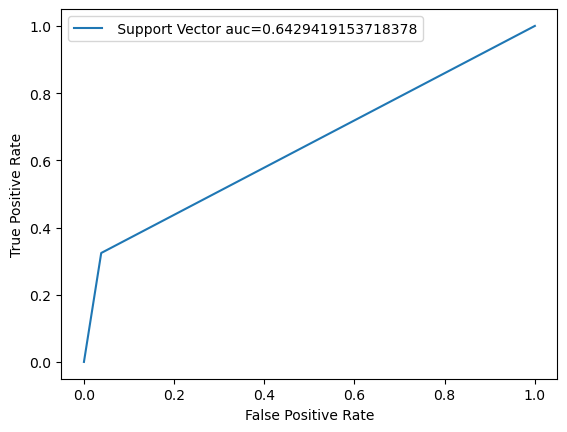

In [55]:
from matplotlib import pyplot
#keep probabilities for the positive outcome only

fpr, tpr, _ = metrics.roc_curve(y_test,y_pred)
auc = metrics.roc_auc_score(y_test,y_pred)
pyplot.plot(fpr,tpr,label=" Support Vector auc="+str(auc))
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
pyplot.show()

**Area Under Curve of support vector machine is 64.3%**

### Bagging 
Bagging improves the performance stability of a model and helps avoid overfitting by separately modeling different data samples and then
combining the results

In [48]:
from sklearn.ensemble import BaggingClassifier
bagging = BaggingClassifier(n_estimators=100, random_state=0)
bagging.fit(X_train, y_train)
y_bagging_pred = bagging.predict(X_test)
print("Bagging Model Accuracy on test set: {:.3f}".format(accuracy_score(y_test,y_bagging_pred)))

Bagging Model Accuracy on test set: 0.822


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


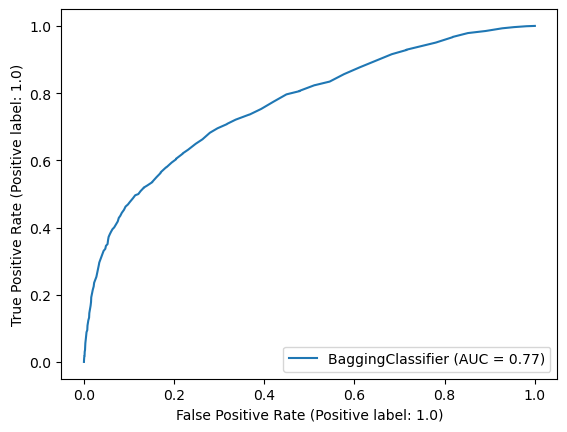

In [49]:
metrics.plot_roc_curve(bagging, X_test, y_test)   
pyplot.show() 

**Area Under Curve for Bagging is 77%**

### Boosting 
In boosted model the goal is to directly improve areas in the data where our model makes errors, by forcing the model to pay more attention to those records. 

In [50]:
from sklearn.ensemble import AdaBoostClassifier 
 
boost = AdaBoostClassifier(n_estimators = 100, random_state=0) 
boost.fit(X_train, y_train) 
 
y_boost_pred = boost.predict(X_test) 
print("Accuracy on test set: {:.3f}".format(accuracy_score(y_boost_pred, y_test))) 

Accuracy on test set: 0.829


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


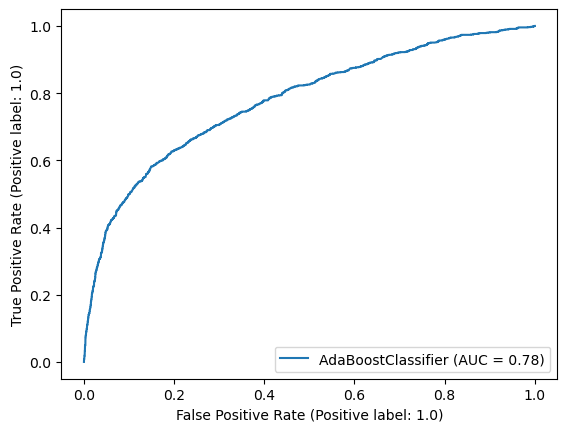

In [51]:
metrics.plot_roc_curve(boost, X_test, y_test)   
pyplot.show()

**Area Under Curve for Boosted Model is 78%**

**We successfully increased the area under curve and accuracy by using boosted model**